# Programming with Python - 1.Analyzing Patient Data

In this lesson we will learn how to manipulate the inflammation dataset with Python. But before we discuss how to deal with many data points, we will show how to store a single value on the computer.

The line below assigns the value 55 to a variable weight_kg:

In [7]:
weight_kg = 55

A variable is just a name for a value, such as x_val, current_temperature, or subject_id. Python’s variables must begin with a letter and are case sensitive. We can create a new variable by assigning a value to it using =. When we are finished typing and press Shift+Enter, the notebook runs our command.

Once a variable has a value, we can print it to the screen:

In [8]:
print(weight_kg)

55


and do arithmetic with it:

In [9]:
print('weight in pounds:', 2.2 * weight_kg)

('weight in pounds:', 121.00000000000001)


As the example above shows, we can print several things at once by separating them with commas.

We can also change a variable’s value by assigning it a new one:

In [10]:
weight_kg = 57.5
print('weight in kilograms is now:', weight_kg)

('weight in kilograms is now:', 57.5)


If we imagine the variable as a sticky note with a name written on it, assignment is like putting the sticky note on a particular value:
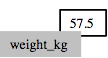
This means that assigning a value to one variable does not change the values of other variables. For example, let’s store the subject’s weight in pounds in a variable:

In [11]:
weight_lb = 2.2 * weight_kg
print('weight in kilograms:', weight_kg, 'and in pounds:', weight_lb)

('weight in kilograms:', 57.5, 'and in pounds:', 126.50000000000001)


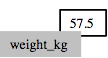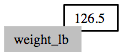
and then change weight_kg:

In [12]:
weight_kg = 100.0
print('weight in kilograms is now:', weight_kg, 'and weight in pounds is still:', weight_lb)

('weight in kilograms is now:', 100.0, 'and weight in pounds is still:', 126.50000000000001)


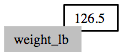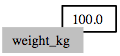

Since weight_lb doesn’t “remember” where its value came from, it isn’t automatically updated when weight_kg changes. This is different from the way spreadsheets work.

# Who’s Who in Memory

You can use the %whos command at any time to see what variables you have created and what modules you have loaded into the computer’s memory. As this is an IPython command, it will only work if you are in an IPython terminal or the Jupyter Notebook.

In [13]:
%whos

Variable    Type     Data/Info
------------------------------
answer      str      Because matplotlib normal<...>(depending on data range)
weight_kg   float    100.0
weight_lb   float    126.5


Words are useful, but what’s more useful are the sentences and stories we build with them. Similarly, while a lot of powerful, general tools are built into languages like Python, specialized tools built up from these basic units live in libraries that can be called upon when needed.

In order to load our inflammation data, we need to access (import in Python terminology) a library called NumPy. In general you should use this library if you want to do fancy things with numbers, especially if you have matrices or arrays. We can import NumPy using:

In [14]:
import numpy

Importing a library is like getting a piece of lab equipment out of a storage locker and setting it up on the bench. Libraries provide additional functionality to the basic Python package, much like a new piece of equipment adds functionality to a lab space. Just like in the lab, importing too many libraries can sometimes complicate and slow down your programs - so we only import what we need for each program. Once we’ve imported the library, we can ask the library to read our data file for us:

In [15]:
numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

array([[ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  1.,  2., ...,  1.,  0.,  1.],
       [ 0.,  1.,  1., ...,  2.,  1.,  1.],
       ..., 
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  2.,  0.],
       [ 0.,  0.,  1., ...,  1.,  1.,  0.]])

The expression numpy.loadtxt(...) is a function call that asks Python to run the function loadtxt which belongs to the numpy library. This dotted notation is used everywhere in Python to refer to the parts of things as thing.component.

numpy.loadtxt has two parameters: the name of the file we want to read, and the delimiter that separates values on a line. These both need to be character strings (or strings for short), so we put them in quotes.

Since we haven’t told it to do anything else with the function’s output, the notebook displays it. In this case, that output is the data we just loaded. By default, only a few rows and columns are shown (with ... to omit elements when displaying big arrays). To save space, Python displays numbers as 1. instead of 1.0 when there’s nothing interesting after the decimal point.

Our call to numpy.loadtxt read our file, but didn’t save the data in memory. To do that, we need to assign the array to a variable. Just as we can assign a single value to a variable, we can also assign an array of values to a variable using the same syntax. Let’s re-run numpy.loadtxt and save its result:

In [16]:
data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

In [17]:
print(data)

[[ 0.  0.  1. ...,  3.  0.  0.]
 [ 0.  1.  2. ...,  1.  0.  1.]
 [ 0.  1.  1. ...,  2.  1.  1.]
 ..., 
 [ 0.  1.  1. ...,  1.  1.  1.]
 [ 0.  0.  0. ...,  0.  2.  0.]
 [ 0.  0.  1. ...,  1.  1.  0.]]


Now that our data is in memory, we can start doing things with it. First, let’s ask what type of thing data refers to:

In [18]:
print(type(data))

<type 'numpy.ndarray'>


The output tells us that data currently refers to an N-dimensional array created by the NumPy library. These data correspond to arthritis patients’ inflammation. The rows are the individual patients and the columns are their daily inflammation measurements.

# Data Type

A Numpy array contains one or more elements of the same type. type will only tell you that a variable is a NumPy array. We can also find out the type of the data contained in the NumPy array.

In [19]:
print(data.dtype)

float64


This tells us that the NumPy array’s elements are floating-point numbers.

With this command we can see the array’s shape:

In [20]:
print(data.shape)

(60, 40)


This tells us that data has 60 rows and 40 columns. When we created the variable data to store our arthritis data, we didn’t just create the array, we also created information about the array, called members or attributes. This extra information describes data in the same way an adjective describes a noun. data.shape is an attribute of data which describes the dimensions of data. We use the same dotted notation for the attributes of variables that we use for the functions in libraries because they have the same part-and-whole relationship.

If we want to get a single number from the array, we must provide an index in square brackets, just as we do in math when referring to an element of a matrix. Our inflammation data has two dimensions, so we will need to use two indices to refer to a value:

In [21]:
print('first value in data:', data[0, 0])

('first value in data:', 0.0)


In [22]:
print('middle value in data:', data[30, 20])

('middle value in data:', 13.0)


The expression data[30, 20] may not surprise you, but data[0, 0] might. Programming languages like Fortran, MATLAB and R start counting at 1, because that’s what human beings have done for thousands of years. Languages in the C family (including C++, Java, Perl, and Python) count from 0 because it represents an offset from the first value in the array (the second value is offset by one index from the first value). This is closer to the way that computers represent arrays (if you are interested in the historical reasons behind counting indices from zero, you can read Mike Hoye’s blog post). As a result, if we have an M×N array in Python, its indices go from 0 to M-1 on the first axis and 0 to N-1 on the second. It takes a bit of getting used to, but one way to remember the rule is that the index is how many steps we have to take from the start to get the item we want.

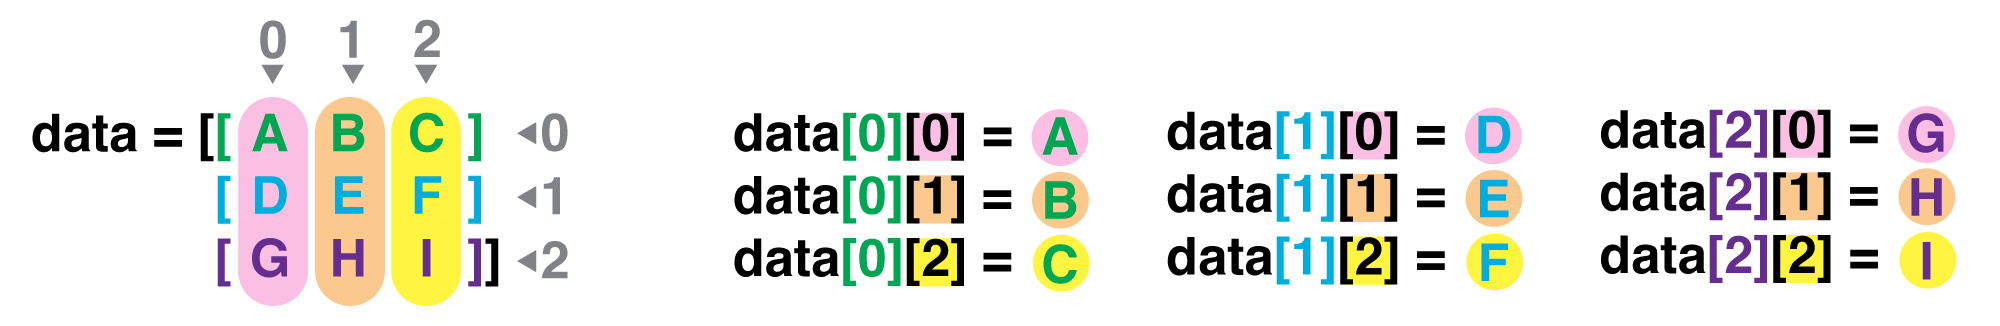

# In the Corner
What may also surprise you is that when Python displays an array, it shows the element with index [0, 0] in the upper left corner rather than the lower left. This is consistent with the way mathematicians draw matrices, but different from the Cartesian coordinates. The indices are (row, column) instead of (column, row) for the same reason, which can be confusing when plotting data.

An index like [30, 20] selects a single element of an array, but we can select whole sections as well. For example, we can select the first ten days (columns) of values for the first four patients (rows) like this:

In [23]:
print(data[0:4, 0:10])

[[ 0.  0.  1.  3.  1.  2.  4.  7.  8.  3.]
 [ 0.  1.  2.  1.  2.  1.  3.  2.  2.  6.]
 [ 0.  1.  1.  3.  3.  2.  6.  2.  5.  9.]
 [ 0.  0.  2.  0.  4.  2.  2.  1.  6.  7.]]


The slice 0:4 means, “Start at index 0 and go up to, but not including, index 4.” Again, the up-to-but-not-including takes a bit of getting used to, but the rule is that the difference between the upper and lower bounds is the number of values in the slice.

We don’t have to start slices at 0:

In [24]:
print(data[5:10, 0:10])

[[ 0.  0.  1.  2.  2.  4.  2.  1.  6.  4.]
 [ 0.  0.  2.  2.  4.  2.  2.  5.  5.  8.]
 [ 0.  0.  1.  2.  3.  1.  2.  3.  5.  3.]
 [ 0.  0.  0.  3.  1.  5.  6.  5.  5.  8.]
 [ 0.  1.  1.  2.  1.  3.  5.  3.  5.  8.]]


We also don’t have to include the upper and lower bound on the slice. If we don’t include the lower bound, Python uses 0 by default; if we don’t include the upper, the slice runs to the end of the axis, and if we don’t include either (i.e., if we just use ‘:’ on its own), the slice includes everything:

In [25]:
small = data[:3, 36:]
print('small is:')
print(small)

small is:
[[ 2.  3.  0.  0.]
 [ 1.  1.  0.  1.]
 [ 2.  2.  1.  1.]]


Arrays also know how to perform common mathematical operations on their values. The simplest operations with data are arithmetic: add, subtract, multiply, and divide. When you do such operations on arrays, the operation is done on each individual element of the array. Thus:

In [26]:
doubledata = data * 2.0

will create a new array doubledata whose elements have the value of two times the value of the corresponding elements in data:

In [27]:
print('original:')
print(data[:3, 36:])
print('doubledata:')
print(doubledata[:3, 36:])

original:
[[ 2.  3.  0.  0.]
 [ 1.  1.  0.  1.]
 [ 2.  2.  1.  1.]]
doubledata:
[[ 4.  6.  0.  0.]
 [ 2.  2.  0.  2.]
 [ 4.  4.  2.  2.]]


If, instead of taking an array and doing arithmetic with a single value (as above) you did the arithmetic operation with another array of the same shape, the operation will be done on corresponding elements of the two arrays. Thus:

In [28]:
tripledata = doubledata + data

will give you an array where tripledata[0,0] will equal doubledata[0,0] plus data[0,0], and so on for all other elements of the arrays.

In [29]:
print('tripledata:')
print(tripledata[:3, 36:])

tripledata:
[[ 6.  9.  0.  0.]
 [ 3.  3.  0.  3.]
 [ 6.  6.  3.  3.]]


Often, we want to do more than add, subtract, multiply, and divide values of data. NumPy knows how to do more complex operations on arrays. If we want to find the average inflammation for all patients on all days, for example, we can ask NumPy to compute data’s mean value:

In [30]:
print(numpy.mean(data))

6.14875


mean is a function that takes an array as an argument. If variables are nouns, functions are verbs: they do things with variables.

# Not All Functions Have Input
Generally, a function uses inputs to produce outputs. However, some functions produce outputs without needing any input. For example, checking the current time doesn’t require any input.

In [31]:
import time
print(time.ctime())

Fri Sep 22 13:21:01 2017


For functions that don’t take in any arguments, we still need parentheses (()) to tell Python to go and do something for us.

NumPy has lots of useful functions that take an array as input. Let’s use three of those functions to get some descriptive values about the dataset. We’ll also use multiple assignment, a convenient Python feature that will enable us to do this all in one line.

In [32]:
maxval, minval, stdval = numpy.max(data), numpy.min(data), numpy.std(data)

print('maximum inflammation:', maxval)
print('minimum inflammation:', minval)
print('standard deviation:', stdval)

('maximum inflammation:', 20.0)
('minimum inflammation:', 0.0)
('standard deviation:', 4.6138331971185664)


# Mystery Functions in IPython
How did we know what functions NumPy has and how to use them? If you are working in the IPython/Jupyter Notebook there is an easy way to find out. If you type the name of something followed by a dot, then you can use tab completion (e.g. type numpy. and then press tab) to see a list of all functions and attributes that you can use. After selecting one you can also add a question mark (e.g. numpy.cumprod?) and IPython will return an explanation of the method! This is the same as doing help(numpy.cumprod).

When analyzing data, though, we often want to look at partial statistics, such as the maximum value per patient or the average value per day. One way to do this is to create a new temporary array of the data we want, then ask it to do the calculation:

In [33]:
patient_0 = data[0, :] # 0 on the first axis (rows), everything on the second (columns)
print('maximum inflammation for patient 0:', patient_0.max())

('maximum inflammation for patient 0:', 18.0)


Everything in a line of code following the ‘#’ symbol is a comment that is ignored by Python. Comments allow programmers to leave explanatory notes for other programmers or their future selves.

We don’t actually need to store the row in a variable of its own. Instead, we can combine the selection and the function call:

In [34]:
print('maximum inflammation for patient 2:', numpy.max(data[2, :]))

('maximum inflammation for patient 2:', 19.0)


What if we need the maximum inflammation for each patient over all days (as in the next diagram on the left), or the average for each day (as in the diagram on the right)? As the diagram below shows, we want to perform the operation across an axis:
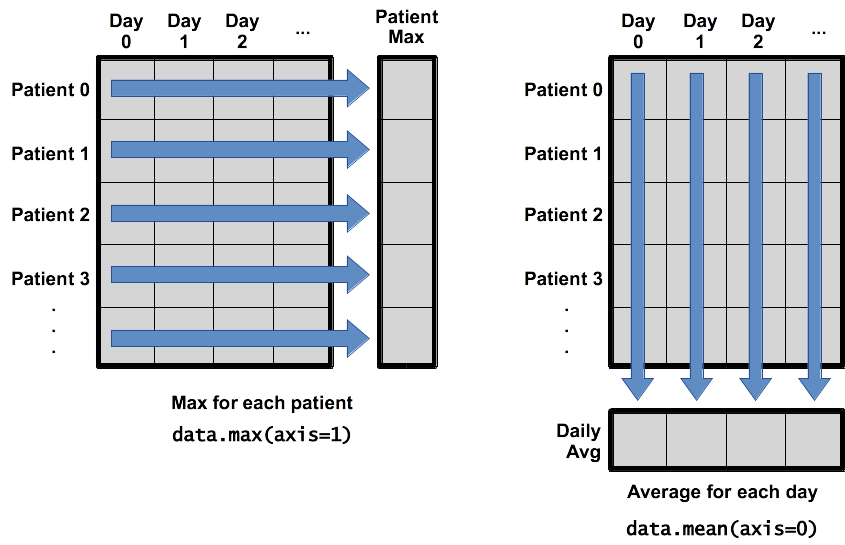
To support this, most array functions allow us to specify the axis we want to work on. If we ask for the average across axis 0 (rows in our 2D example), we get:

In [35]:
print(numpy.mean(data, axis=0))

[  0.           0.45         1.11666667   1.75         2.43333333   3.15
   3.8          3.88333333   5.23333333   5.51666667   5.95         5.9
   8.35         7.73333333   8.36666667   9.5          9.58333333
  10.63333333  11.56666667  12.35        13.25        11.96666667
  11.03333333  10.16666667  10.           8.66666667   9.15         7.25
   7.33333333   6.58333333   6.06666667   5.95         5.11666667   3.6
   3.3          3.56666667   2.48333333   1.5          1.13333333
   0.56666667]


As a quick check, we can ask this array what its shape is:

In [36]:
print(numpy.mean(data, axis=0).shape)

(40,)


The expression (40,) tells us we have an N×1 vector, so this is the average inflammation per day for all patients. If we average across axis 1 (columns in our 2D example), we get:

In [37]:
print(numpy.mean(data, axis=1))

[ 5.45   5.425  6.1    5.9    5.55   6.225  5.975  6.65   6.625  6.525
  6.775  5.8    6.225  5.75   5.225  6.3    6.55   5.7    5.85   6.55
  5.775  5.825  6.175  6.1    5.8    6.425  6.05   6.025  6.175  6.55
  6.175  6.35   6.725  6.125  7.075  5.725  5.925  6.15   6.075  5.75
  5.975  5.725  6.3    5.9    6.75   5.925  7.225  6.15   5.95   6.275  5.7
  6.1    6.825  5.975  6.725  5.7    6.25   6.4    7.05   5.9  ]


which is the average inflammation per patient across all days.

The mathematician Richard Hamming once said, “The purpose of computing is insight, not numbers,” and the best way to develop insight is often to visualize data. Visualization deserves an entire lecture (of course) of its own, but we can explore a few features of Python’s matplotlib library here. While there is no “official” plotting library, this package is the de facto standard. First, we will import the pyplot module from matplotlib and use two of its functions to create and display a heat map of our data:

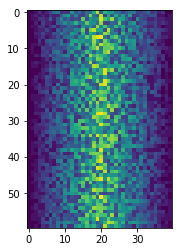

In [38]:
import matplotlib.pyplot
image = matplotlib.pyplot.imshow(data)
matplotlib.pyplot.show()

Blue regions in this heat map are low values, while red shows high values. As we can see, inflammation rises and falls over a 40-day period.

# Some IPython Magic
If you’re using an IPython / Jupyter notebook, you’ll need to execute the following command in order for your matplotlib images to appear in the notebook when show() is called:

In [39]:
%matplotlib inline

The % indicates an IPython magic function - a function that is only valid within the notebook environment. Note that you only have to execute this function once per notebook.

Let’s take a look at the average inflammation over time:

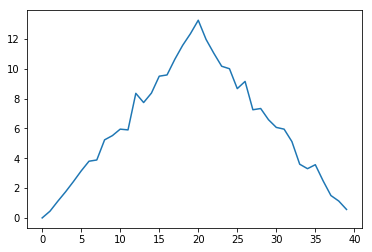

In [40]:
ave_inflammation = numpy.mean(data, axis=0)
ave_plot = matplotlib.pyplot.plot(ave_inflammation)
matplotlib.pyplot.show()

Here, we have put the average per day across all patients in the variable ave_inflammation, then asked matplotlib.pyplot to create and display a line graph of those values. The result is roughly a linear rise and fall, which is suspicious: based on other studies, we expect a sharper rise and slower fall. Let’s have a look at two other statistics:

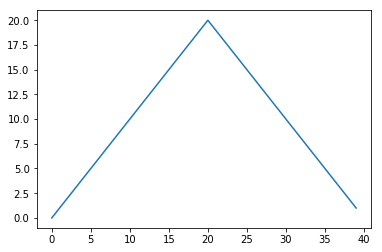

In [41]:
max_plot = matplotlib.pyplot.plot(numpy.max(data, axis=0))
matplotlib.pyplot.show()

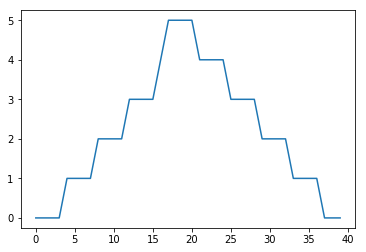

In [42]:
min_plot = matplotlib.pyplot.plot(numpy.min(data, axis=0))
matplotlib.pyplot.show()

The maximum value rises and falls perfectly smoothly, while the minimum seems to be a step function. Neither result seems particularly likely, so either there’s a mistake in our calculations or something is wrong with our data. This insight would have been difficult to reach by examining the data without visualization tools.

You can group similar plots in a single figure using subplots. This script below uses a number of new commands. The function matplotlib.pyplot.figure() creates a space into which we will place all of our plots. The parameter figsize tells Python how big to make this space. Each subplot is placed into the figure using its add_subplot method. The add_subplot method takes 3 parameters. The first denotes how many total rows of subplots there are, the second parameter refers to the total number of subplot columns, and the final parameter denotes which subplot your variable is referencing (left-to-right, top-to-bottom). Each subplot is stored in a different variable (axes1, axes2, axes3). Once a subplot is created, the axes can be titled using the set_xlabel() command (or set_ylabel()). Here are our three plots side by side:

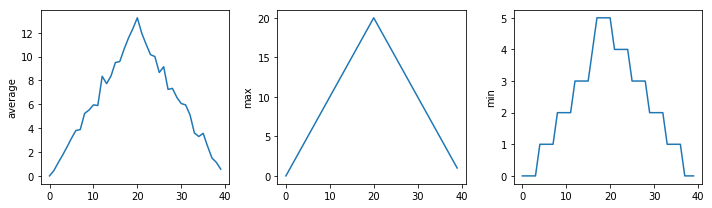

In [46]:
import numpy
import matplotlib.pyplot

data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')
fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average')
axes1.plot(numpy.mean(data, axis=0))

axes2.set_ylabel('max')
axes2.plot(numpy.max(data, axis=0))

axes3.set_ylabel('min')
axes3.plot(numpy.min(data, axis=0))

fig.tight_layout()

matplotlib.pyplot.show()

The call to loadtxt reads our data, and the rest of the program tells the plotting library how large we want the figure to be, that we’re creating three subplots, what to draw for each one, and that we want a tight layout. (Perversely, if we leave out that call to fig.tight_layout(), the graphs will actually be squeezed together more closely.)

# Scientists Dislike Typing
We will always use the syntax import numpy to import NumPy. However, in order to save typing, it is often suggested to make a shortcut like so: import numpy as np. If you ever see Python code online using a NumPy function with np (for example, np.loadtxt(...)), it’s because they’ve used this shortcut. When working with other people, it is important to agree on a convention of how common libraries are imported.

# Check Your Understanding
Draw diagrams showing what variables refer to what values after each statement in the following program:

In [47]:
mass = 47.5
age = 122
mass = mass * 2.0
age = age - 20

# Sorting Out References
What does the following program print out?

In [48]:
first, second = 'Grace', 'Hopper'
third, fourth = second, first
print(third, fourth)

('Hopper', 'Grace')


# Slicing Strings
A section of an array is called a slice. We can take slices of character strings as well:

In [49]:
element = 'oxygen'
print('first three characters:', element[0:3])
print('last three characters:', element[3:6])

('first three characters:', 'oxy')
('last three characters:', 'gen')


What is the value of element[:4]? What about element[4:]? Or element[:]?

In [50]:
print element[:4], element[4:], element[:]

oxyg en oxygen


What is element[-1]? What is element[-2]?

In [51]:
print( element[-1], element[-2])

n e


Given those answers, explain what element[1:-1] does.

In [52]:
print( element[1:-1])

xyge


# Thin Slices
The expression element[3:3] produces an empty string, i.e., a string that contains no characters. If data holds our array of patient data, what does data[3:3, 4:4] produce? What about data[3:3, :]?

In [63]:
print (data[3:3,4:4], data[3:3,:])

[] []


# Plot Scaling

Why do all of our plots stop just short of the upper end of our graph?

In [66]:
answer = "Because matplotlib normally sets x and y axes limits to the min and max of our data (depending on data range)"

In [67]:
print (answer)

Because matplotlib normally sets x and y axes limits to the min and max of our data (depending on data range)


If we want to change this, we can use the set_ylim(min, max) method of each ‘axes’, for example:

In [68]:
axes3.set_ylim(0,6)

(0, 6)


Update your plotting code to automatically set a more appropriate scale. (Hint: you can make use of the max and min methods to help.)

In [81]:
# One method
axes3.set_ylabel('min')
axes3.plot(numpy.min(data, axis=0))
axes3.set_ylim(0,6)

# code:
answer_code ="axes3.set_ylabel('min')\naxes3.plot(numpy.min(data, axis=0))\naxes3.set_ylim(0,6)"

# A more automated approach
a_more_automated_answer_code ="min_data = numpy.min(data, axis=0)\naxes3.set_ylabel('min')\naxes3.plot(min_data)\naxes3.set_ylim(numpy.min(min_data), numpy.max(min_data) * 1.1)"

In [84]:
print (answer_code)

axes3.set_ylabel('min')
axes3.plot(numpy.min(data, axis=0))
axes3.set_ylim(0,6)


In [85]:
print (a_more_automated_answer_code)

min_data = numpy.min(data, axis=0)
axes3.set_ylabel('min')
axes3.plot(min_data)
axes3.set_ylim(numpy.min(min_data), numpy.max(min_data) * 1.1)


# Drawing Straight Lines
In the center and right subplots above, we expect all lines to look like step functions, because non-integer value are not realistic for the minimum and maximum values. However, you can see that the lines are not always vertical or horizontal, and in particular the step function in the subplot on the right looks slanted. Why is this?

In [109]:
answer = "Because matplotlib interpolates (draws a straight line) between the points. One way to do avoid this is to use the Matplotlib drawstyle option:"

In [110]:
print answer 

Because matplotlib interpolates (draws a straight line) between the points. One way to do avoid this is to use the Matplotlib drawstyle option:


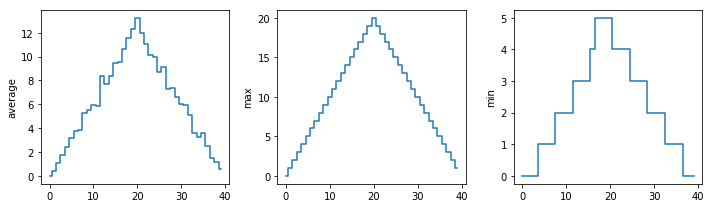

In [112]:
import numpy
import matplotlib.pyplot

data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average')
axes1.plot(numpy.mean(data, axis=0), drawstyle='steps-mid')

axes2.set_ylabel('max')
axes2.plot(numpy.max(data, axis=0), drawstyle='steps-mid')

axes3.set_ylabel('min')
axes3.plot(numpy.min(data, axis=0), drawstyle='steps-mid')

fig.tight_layout()

matplotlib.pyplot.show()

# Make Your Own Plot
Create a plot showing the standard deviation (numpy.std) of the inflammation data for each day across all patients.

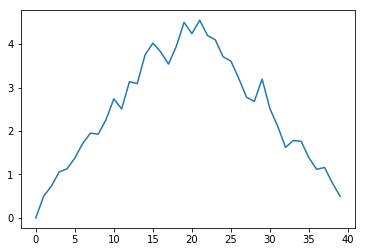

In [115]:
max_plot = matplotlib.pyplot.plot(numpy.std(data, axis=0))
matplotlib.pyplot.show()

# Moving Plots Around
Modify the program to display the three plots on top of one another instead of side by side.

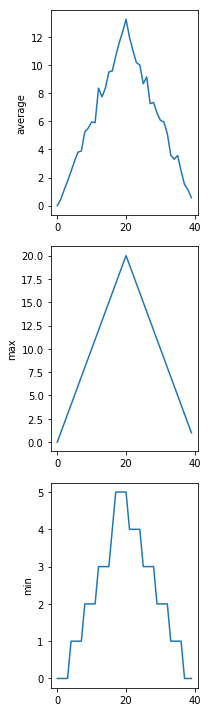

In [116]:
import numpy
import matplotlib.pyplot

data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

# change figsize (swap width and height)
fig = matplotlib.pyplot.figure(figsize=(3.0, 10.0))

# change add_subplot (swap first two parameters)
axes1 = fig.add_subplot(3, 1, 1)
axes2 = fig.add_subplot(3, 1, 2)
axes3 = fig.add_subplot(3, 1, 3)

axes1.set_ylabel('average')
axes1.plot(numpy.mean(data, axis=0))

axes2.set_ylabel('max')
axes2.plot(numpy.max(data, axis=0))

axes3.set_ylabel('min')
axes3.plot(numpy.min(data, axis=0))

fig.tight_layout()

matplotlib.pyplot.show()

# Stacking Arrays
Arrays can be concatenated and stacked on top of one another, using NumPy’s vstack and hstack functions for vertical and horizontal stacking, respectively.

In [117]:
import numpy

A = numpy.array([[1,2,3], [4,5,6], [7, 8, 9]])
print('A = ')
print(A)

B = numpy.hstack([A, A])
print('B = ')
print(B)

C = numpy.vstack([A, A])
print('C = ')
print(C)

A = 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
B = 
[[1 2 3 1 2 3]
 [4 5 6 4 5 6]
 [7 8 9 7 8 9]]
C = 
[[1 2 3]
 [4 5 6]
 [7 8 9]
 [1 2 3]
 [4 5 6]
 [7 8 9]]


Write some additional code that slices the first and last columns of A, and stacks them into a 3x2 array. Make sure to print the results to verify your solution.

In [120]:
D = numpy.hstack((A[:, :1], A[:, -1:]))

In [121]:
print ("D = ")
print (D)

D = 
[[1 3]
 [4 6]
 [7 9]]


In [124]:
D = numpy.delete(A, 1, 1)

In [125]:
print "D = "
print D

D = 
[[1 3]
 [4 6]
 [7 9]]


# Change In Inflammation
This patient data is longitudinal in the sense that each row represents a series of observations relating to one individual. This means that change inflammation is a meaningful concept.

The numpy.diff() function takes a NumPy array and returns the difference along a specified axis.

Which axis would it make sense to use this function along?

In [141]:
answer = "Since the row axis (0) is patients, it does not make sense to get the difference between two arbitrary patients. The\ncolumn axis (1) is in days, so the differnce is the change in inflammation – a meaningful concept.\nnumpy.diff(data, axis=1)"

In [142]:
print (answer)

Since the row axis (0) is patients, it does not make sense to get the difference between two arbitrary patients. The
column axis (1) is in days, so the differnce is the change in inflammation – a meaningful concept.
numpy.diff(data, axis=1)


If the shape of an individual data file is (60, 40) (60 rows and 40 columns), what would the shape of the array be after you run the diff() function and why?

In [143]:
answer = "The shape will be (60, 39) because there is one fewer difference between columns than there are columns in the data."

In [144]:
print (answer)

The shape will be (60, 39) because there is one fewer difference between columns than there are columns in the data.


How would you find the largest change in inflammation for each patient? Does it matter if the change in inflammation is an increase or a decrease?

In [156]:
largest_change = numpy.max(numpy.diff(data, axis=1), axis=1)
answer = "By using the numpy.max() function after you apply the numpy.diff() function, you will get the largest difference between days."

In [167]:
print (answer)
print ("largest change :\n",largest_change)

answer : By using the numpy.max() function after you apply the numpy.diff() function, you will get the largest difference between days.
largest change :
[  7.  12.  11.  10.  11.  13.  10.   8.  10.  10.   7.   7.  13.   7.  10.
  10.   8.  10.   9.  10.  13.   7.  12.   9.  12.  11.  10.  10.   7.  10.
  11.  10.   8.  11.  12.  10.   9.  10.  13.  10.   7.   7.  10.  13.  12.
   8.   8.  10.  10.   9.   8.  13.  10.   7.  10.   8.  12.  10.   7.  12.]


If a difference is a decrease, then the difference will be negative. If you are interested in the magnitude of the change and not just the direction, the numpy.absolute() function will provide that.

Notice the difference if you get the largest absolute difference between readings.

In [169]:
absolute_largest_change=numpy.max(numpy.absolute(numpy.diff(data, axis=1)), axis=1)

In [170]:
print ("absolute largest change:")
print (absolute_largest_change)

absolute largest change:
[ 12.  14.  11.  13.  11.  13.  10.  12.  10.  10.  10.  12.  13.  10.  11.
  10.  12.  13.   9.  10.  13.   9.  12.   9.  12.  11.  10.  13.   9.  13.
  11.  11.   8.  11.  12.  13.   9.  10.  13.  11.  11.  13.  11.  13.  13.
  10.   9.  10.  10.   9.   9.  13.  10.   9.  10.  11.  13.  10.  10.  12.]


# Key Points

- Import a library into a program using import libraryname.
- Use the numpy library to work with arrays in Python.
- Use variable = value to assign a value to a variable in order to record it in memory.
- Variables are created on demand whenever a value is assigned to them.
- Use print(something) to display the value of something.
- The expression array.shape gives the shape of an array.
- Use array[x, y] to select a single element from a 2D array.
- Array indices start at 0, not 1.
- Use low:high to specify a slice that includes the indices from low to high-1.
- All the indexing and slicing that works on arrays also works on strings.
- Use # some kind of explanation to add comments to programs.
- Use numpy.mean(array), numpy.max(array), and numpy.min(array) to calculate simple statistics.
- Use numpy.mean(array, axis=0) or numpy.mean(array, axis=1) to calculate statistics across the specified axis.
- Use the pyplot library from matplotlib for creating simple visualizations.